<a href="https://colab.research.google.com/github/SAIRAALMAS88/SAIRAALMAS88/blob/main/Face_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install face_recognition opencv-python dlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566162 sha256=1285cc0e145c55f659a649b2e50dcab0862a06de912e82bbbe65f42917225a53
  Stored in directory: /root/.cache/pip/wheels/04/52/ec/9355da79c29f160b038a20c784db2803c2f9fa2c8a462c176a
Successfully built face-recognition-models


In [2]:
import face_recognition
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # For displaying images in Colab

In [17]:
# Load images
person1_image = face_recognition.load_image_file("/content/babar1.jpeg")
person2_image = face_recognition.load_image_file("/content/haris.webp")

# Encode faces
person1_encoding = face_recognition.face_encodings(person1_image)[0]
person2_encoding = face_recognition.face_encodings(person2_image)[0]

# Create a list of known face encodings and their names
known_face_encodings = [person1_encoding, person2_encoding]
known_face_names = ["Babar", "Haris"]

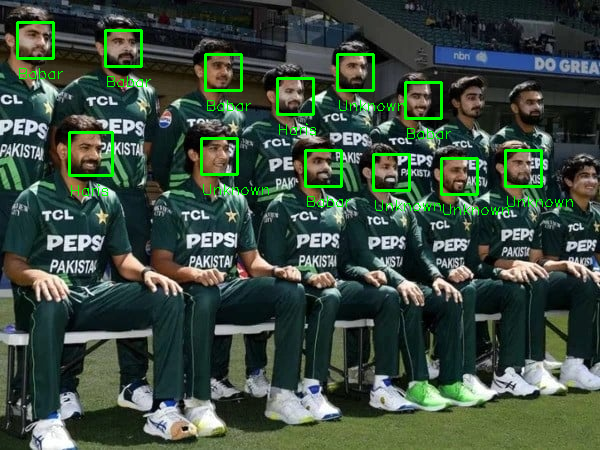

In [18]:
# Load the test image
test_image = face_recognition.load_image_file("/content/PCT_full.jpeg")

# Find all face locations and encodings in the test image
face_locations = face_recognition.face_locations(test_image)
face_encodings = face_recognition.face_encodings(test_image, face_locations)

# Convert the image to BGR format for OpenCV
test_image_bgr = cv2.cvtColor(test_image, cv2.COLOR_RGB2BGR)

# Loop through each face found in the test image
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # Compare the face with known faces
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
    name = "Unknown"

    # Use the known face with the smallest distance to the new face
    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    # Draw a rectangle around the face
    cv2.rectangle(test_image_bgr, (left, top), (right, bottom), (0, 255, 0), 2)

    # Draw the name below the face
    cv2.putText(test_image_bgr, name, (left, bottom + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

# Display the result
cv2_imshow(test_image_bgr)